## Top 5000 Albums Spotify Data Visualization

Greetings! Today we will be doing some Data Visualization and exploratory analysis on the Top 5000 Albums dataset.
You can find the dataset here if you would like to use it: https://www.kaggle.com/datasets/lucascantu/top-5000-albums-of-all-time-spotify-features?select=Top5000.csv

### Visualization Technique

One of the visualizations I am going to use for this exploratory data analysis is a histogram via plotly, and matplotlib. A histogram is a graph that shows the distribution frequency of numerical data, where the height represents the frequency and the width represents the value of the variable. Histograms assist the audience in understanding quickly the patterns and traits of a substantial amount of data. The second visualization I will use is the barchart. Barcharts are used to contrast a categorical dataset. The X-axis represents the categories; The Y axis represents a value for those categories, this can also be vice versa depending on the plot.

### Histograms

A histogram is best used when dealing with numerical data that is continuous between select intervals(e.g years, days, months). In other words, histograms make clear the frequency or occurrence of a certain variable within a certain range. They can also be customized to a certain extent for example, replacing frequency with density and adjusting the interval between bins.

Some common missteps when using histograms:

   - Confusion with barcharts: histograms and barcharts look almost identical and can easily be confused with one another.
      However, both histograms and barcharts have their own respective use cases. A bar chart represents a graphical contrast.
      of categorical variables. A histogram displays the distribution of numerical variables.
     
   - Bin size: Having too many bins, or too little bins can muddle the results of you data, and make it hard to understand the overall picture.
   - Comparing more than 2 variables: histograms are best used with 2 variables, adding more causes the visualization to become very difficult to understand.


# Visualization Tool

I will be using plotly dash and plotly libraries for my visualizations. The plotly dash, and in this case, Jupyter Dash library allows for interactive and dynamic visualizations fully within jupyter notebook.

### Plotly & JupyterDash

Plotly and Dash was founded by Alex Johnson, Jack Parmer, Chris Parmer, and Matthew Sundquist. They described plotly as a low-code open source dynamic library that allows fast development of dynamic visualizations. Essentially allowing for the functionality of a web application-like dashboard within jupyter notebook. These include interactive histograms,barcharts, scatterplots, UI elements and much more.

#### Pros & Cons of Plotly & Dash

Pros: 
   - Jupyter 2 and Django 4 integrations.
   - Cross-filtering with Plotly charts.
   - multi-page apps
   - More interactive & visually flexible than Matplotlib or Seaborn.
   
Cons:
   - creating interactive elements can be challenging
   - Confusing setup for online plotly and offline plotly.
   - Documentation not as extensive as matplotlib,seaborn

### Plotly & JupyterDash Installation

In [426]:
!pip install plotly

In [ ]:
!pip install dash

In [ ]:
!pip install jupyter-dash

### Seaborn

I will also be using Seaborn for some plots within this notebook. Founded by Michael Waskom, Seaborn is a library built on top of matplotlib that provides a more streamlined interface and attractive visualizations. This also includes more intuitive integration with pandas dataframes. 

#### Seaborn Pros & Cons

Pros: 
   - Tight integration with pandas.
   - built on top of matplotlib.
   - interactive elements
   - Attractive visualizations
   
Cons:
   - limited interactivity compared to dash

### Seaborn Installation

In [ ]:
!pip install seaborn

## Demonstration

My objective of this analysis is to identify common trends, and patterns of classic albums and popular music from the legendary and foundational periods of the 70s, and 80s, and compare them to the modern experimental and genre blending styles that we have arrived at today.

The dataset has the basic categorical data of album genre and artist, but also comes with interesting quantifiable terms: danceability, loudness, acousticness, tempo, instrumentalness, and other terms given quantitative values. These will help us to understand how the actual music and production has changed throughout the years as well. To start lets import the required libraries for this analysis...

In [2]:
from jupyter_dash import JupyterDash

In [3]:
import numpy as np
import pandas as pd
import dash
from dash import dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

<ipython-input-3-d84d3a037c89>:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


JupyterDash Inline Application

In [4]:
# Build App
def launch_dashapp(df,title,app_name):
    app = JupyterDash(__name__)
    app.layout = html.Div([
        html.H1(app_name),
        dcc.Graph(id='graph'),
        html.Label([
            "Input Variable",
            dcc.Dropdown(
                id='column-dropdown', clearable=False,
                value = df.columns[1], options=[
                    {'label': c, 'value': c}
                    for c in df.columns
                ])
        ]),
    ])
    # Define callback to update graph
    @app.callback(
        Output('graph', 'figure'),
        [Input("column-dropdown", "value")]
    )
    def update_figure(column):
        return px.histogram(
            df, x= df['year'], y=column,
            title=title
        )
    # Run app and display result inline in the notebook
    app.run_server(mode='inline')

In [5]:
def generate_top_genres_barplot(df):
    top_genres = df["gens"].value_counts().head(50)
    figure(figsize=(19,30 ), dpi=80)
    df['gens'].value_counts().head(50).plot(kind='barh')

## Viewing and Cleaning the Data

In [6]:
df = pd.read_csv("Top5000/Top5000.csv")

In [399]:
df.shape
##4402 rows, 20 columns

(4402, 20)

In [400]:
#dataset columns
df.columns

Index(['Unnamed: 0', 'ars_name', 'rel_date', 'gens', 'descs', 'avg_rat',
       'num_rat', 'num_revs', 'album', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'duration_ms', 'time_signature'],
      dtype='object')

In [401]:
#snapshot of our dataset
df.head()

,Unnamed: 0,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,0,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,1,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,2,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,3,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734,Kid A,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
4,4,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379,To Pimp a Butterfly,0.322889,0.590750,0.707625,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750000,3.812500


In [402]:
#remove unecessary starting column
df.drop('Unnamed: 0',axis=1)

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734,Kid A,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
4,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379,To Pimp a Butterfly,0.322889,0.590750,0.707625,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750000,3.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,John Hiatt,May 1987,"Singer/Songwriter, Roots Rock, Americana","love, lethargic, lonely, existential, melodic,...",3.68,727,37,Bring the Family,0.286402,0.607100,0.460700,0.001658,0.125710,-12.683700,0.030090,106.136700,0.568300,273146.700000,4.000000
4398,Catharsis,1999,"Crust Punk, Metalcore","male vocals, anarchism, aggressive, angry, hea...",3.65,616,6,Passion,0.156502,0.572050,0.621100,0.004154,0.250530,-6.659900,0.088560,127.249950,0.432750,202675.450000,3.950000
4399,Gracious,17 July 1970,"Progressive Rock, Symphonic Prog",NaN,3.69,565,32,Gracious!,0.075487,0.528636,0.731000,0.000128,0.222845,-4.805273,0.049027,149.398818,0.622545,193269.454545,4.000000
4400,And Also the Trees,12 November 2007,Art Rock,"atmospheric, poetic, dark, male vocals, ominou...",3.68,524,15,(Listen For) The Rag and Bone Man,0.417308,0.397462,0.458000,0.543231,0.127646,-13.088692,0.037354,118.958923,0.252892,229115.846154,3.923077


In [403]:
#data types and counts within our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4402 non-null   int64  
 1   ars_name          4402 non-null   object 
 2   rel_date          4402 non-null   object 
 3   gens              4402 non-null   object 
 4   descs             4304 non-null   object 
 5   avg_rat           4402 non-null   float64
 6   num_rat           4402 non-null   object 
 7   num_revs          4402 non-null   int64  
 8   album             4402 non-null   object 
 9   acousticness      4402 non-null   float64
 10  danceability      4402 non-null   float64
 11  energy            4402 non-null   float64
 12  instrumentalness  4402 non-null   float64
 13  liveness          4402 non-null   float64
 14  loudness          4402 non-null   float64
 15  speechiness       4402 non-null   float64
 16  tempo             4402 non-null   float64


Now that we have a general overview of our data, lets start with a time distribution to see which time periods most of these albums originate from

In [404]:
#changing the "rel_date" column to a datetime object for easier processing. 
#creating a year column from the rel_date for use with the time distribution.
from dateutil.parser import parse
df['rel_date'] = pd.to_datetime(df['rel_date'])
df["year"] = df['rel_date'].dt.year

<AxesSubplot:xlabel='year', ylabel='Density'>

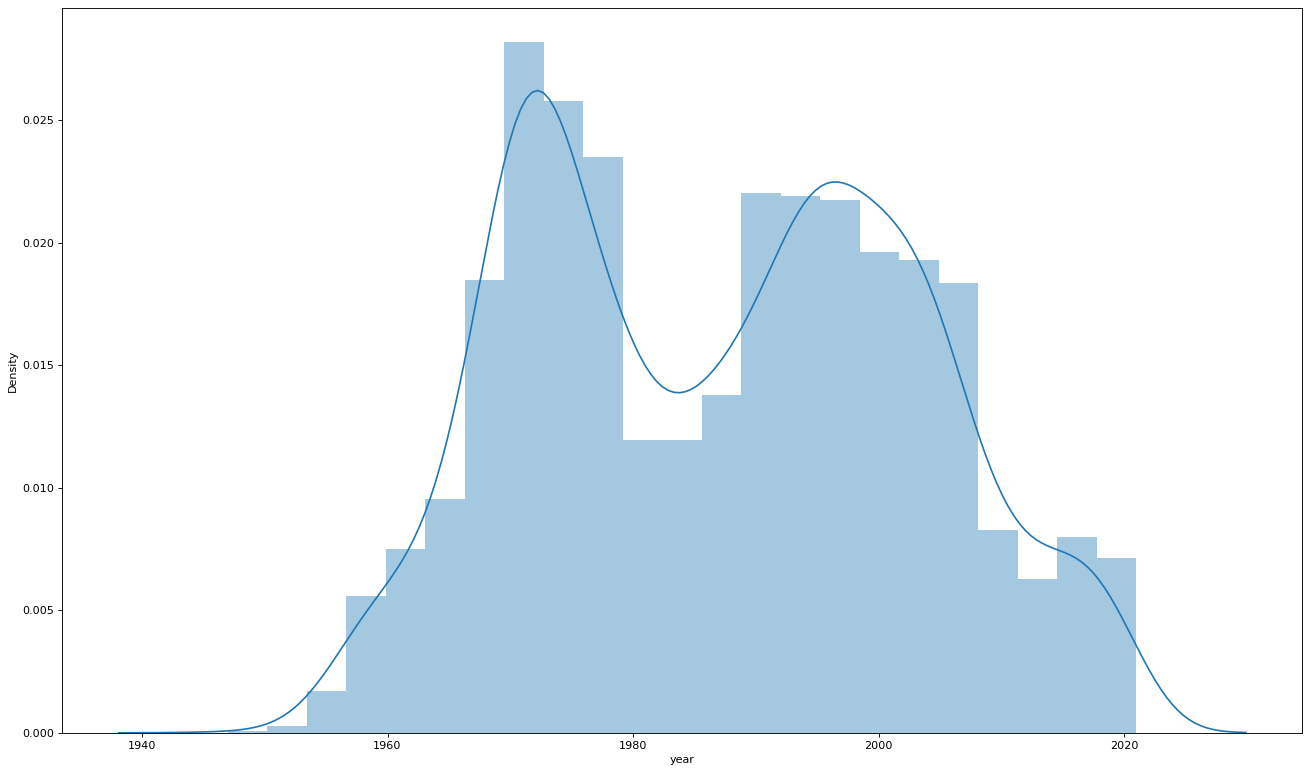

In [405]:
from matplotlib.pyplot import figure
figure(figsize=(20, 12), dpi=80)
import matplotlib.pyplot as plt
sns.distplot(df['year'])

Here we can see a very unsurprising result to avid music fans, most of the albums in our dataset hail from the 1960s-1970s, with a similary impressive peak from the 1990s to the 2000s and a steep drop off when approaching the 2010s. 

## Classics Analysis

In [417]:
#Choosing the period of 1960-1989 as this was considered a very exciting time in music history
albums_classics = df[(df['year'] >= 1960) & (df['year'] <= 1989)]

In [407]:
albums_classics.shape

(2208, 21)

In [408]:
albums_classics.columns

Index(['Unnamed: 0', 'ars_name', 'rel_date', 'gens', 'descs', 'avg_rat',
       'num_rat', 'num_revs', 'album', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'duration_ms', 'time_signature', 'year'],
      dtype='object')

In [418]:
drop_cols = ['Unnamed: 0','speechiness','valence','num_revs','num_rat','album','ars_name','gens','descs','avg_rat']
albums_classics = albums_classics.drop(drop_cols,axis=1)

In [419]:
launch_dashapp(albums_classics, "Classic Album Traits", "Top5000Album")

# Ties to History: Instrumentalness

Selecting "instrumentalness" from the dropdown menu, we can see that it peaked in the year 1973.
1973 coeincides with what many historians dub as the "Greatest year for Rock music ever", due to the several high charting albums released that year and the huge emergence of progressive rock and disco genres. Progressive Rock mainly involved merging a seperate genre with rock, this would have involved adopting new instrumentation techniques such as improvision from jazz music in the case of Pink Floyd

# Ties to History: Danceability

Selecting "danceability" from the dropdown menu we can also see a peak in Danceability in the 70s which we can attribute to the emergence of Disco. the 70s are synonymous with fashion trends, and vernaclular attributed to Disco Music. Disco's popularity was shortlived, however it strongly reemerged later in the form of house music,techno music, and electronic dance music later on

# Top Classic Genres

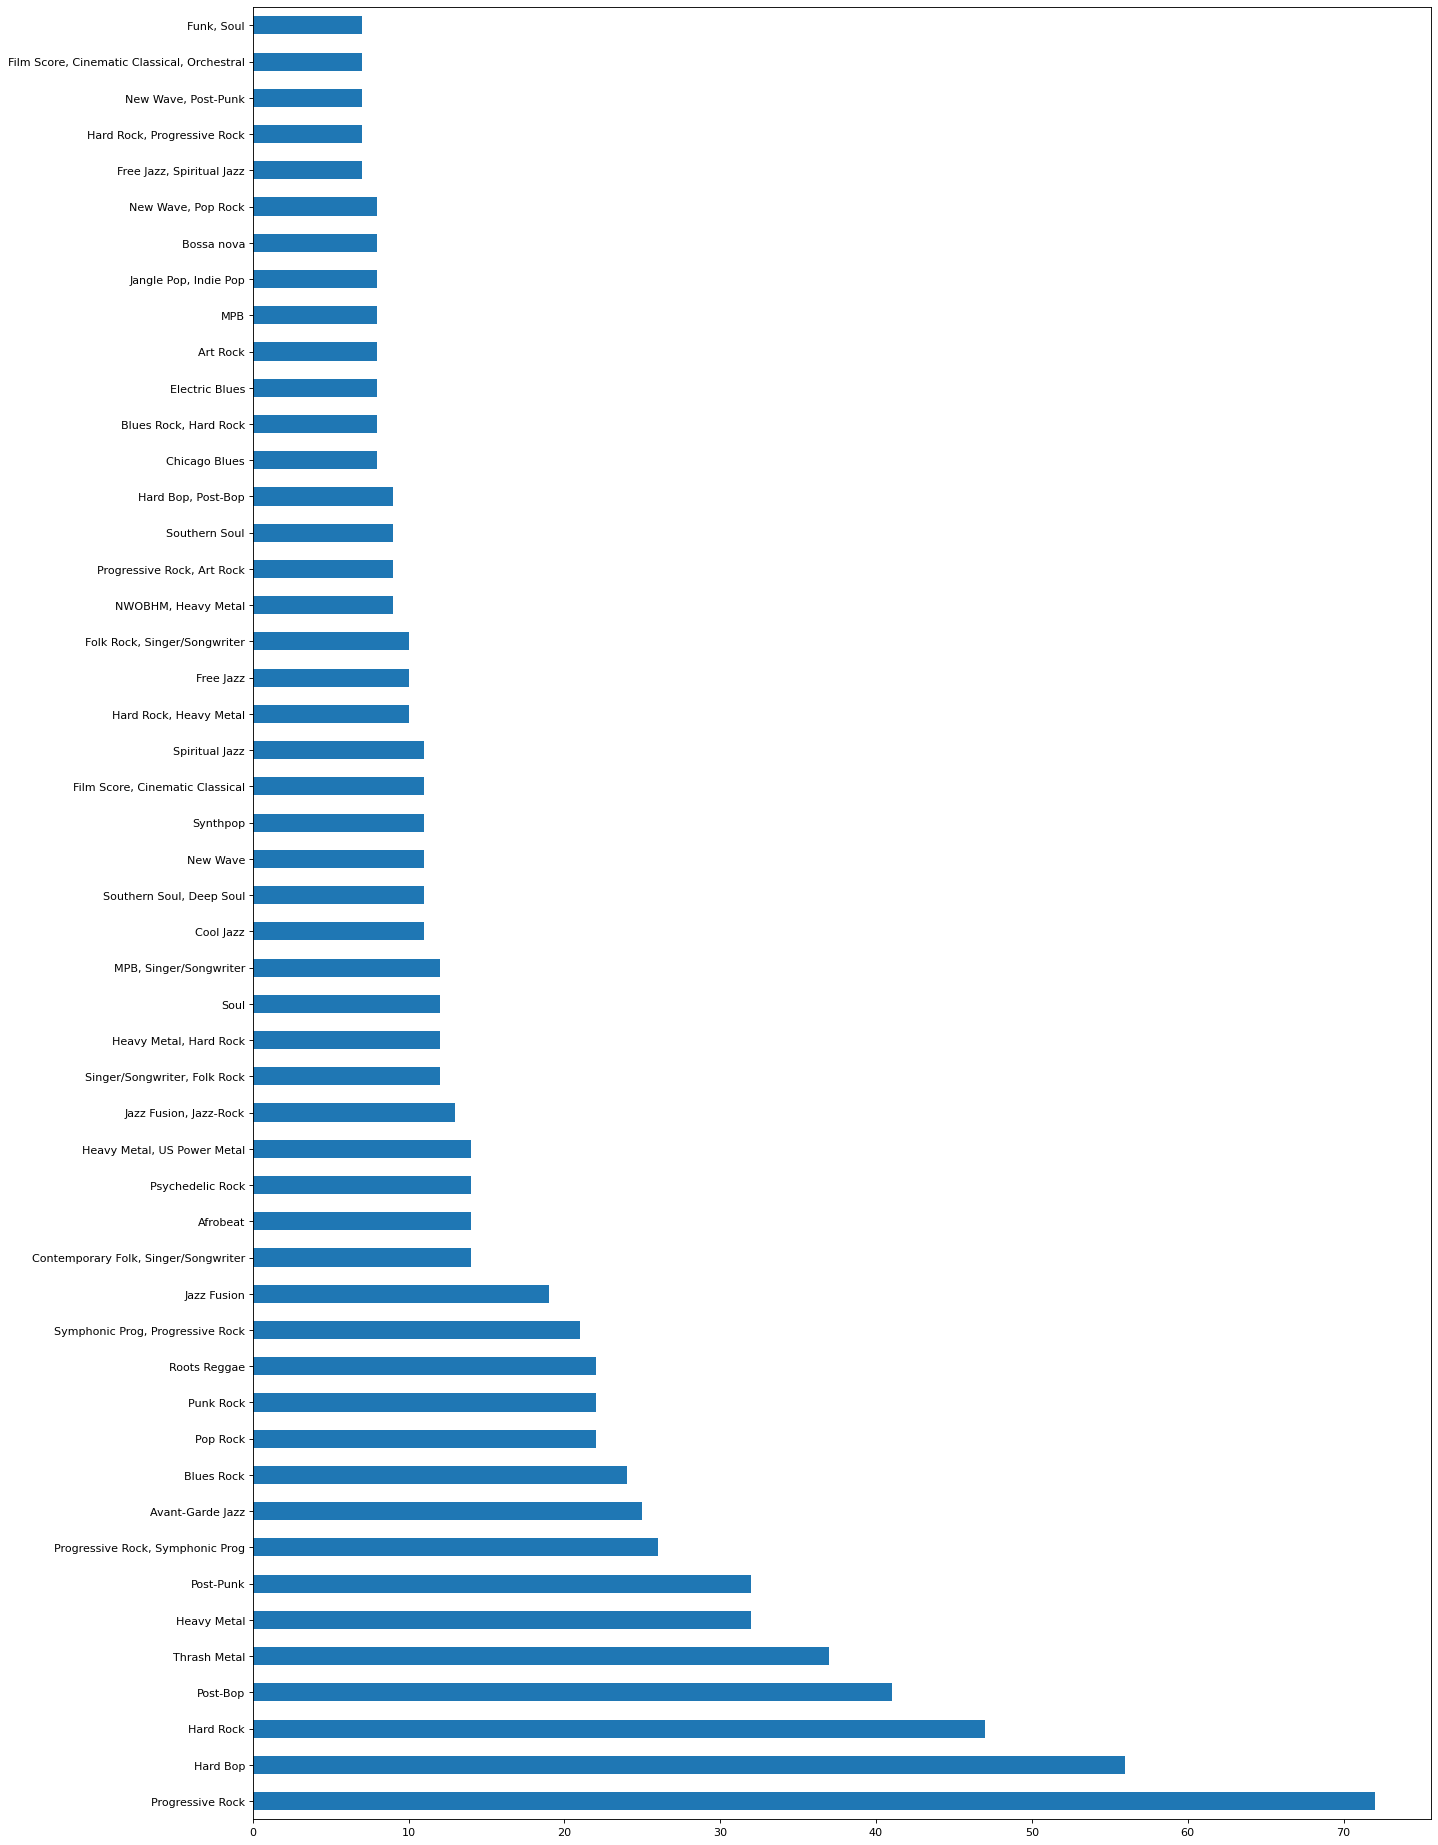

In [420]:
#add label
albums_classics = df[(df['year'] >= 1960) & (df['year'] <= 1989)]
generate_top_genres_barplot(albums_classics)

Looking at our top genres, we can see many of them are foundational in nature. Such as: "Soul,Funk, Heavy Metal, Hard Rock, Blues Rock, and several others"

## Modern Music Analysis

In [427]:
#to gain a larger data pool, I will be choosing the period of 2000-2020, however there are interesting shifts between
#2000-2010 and 2010-2020 
albums_modern = df[(df['year'] >= 2000) & (df['year'] <= 2020)]

In [428]:
albums_modern.shape

(1120, 21)

In [429]:
drop_cols = ['Unnamed: 0','speechiness','valence','num_revs','num_rat','album','ars_name','gens','descs','avg_rat']
albums_modern = albums_modern.drop(drop_cols,axis=1)

In [430]:
launch_dashapp(albums_modern, "Modern Album Traits", "Top5000Album")

# Ties to History: Instrumentalness

Selecting "instrumentalness" we can see an interesting downward trend, with a peak in 2009, and a gradual trend down to 2020. This can be attributed to the wider usage, and popularity of Digital Audio Workstation programs. A research article on Digital Audio Workstations states, "One of the first things we noticed upon analyzing our data was how many respondents (77.4%) learned to use their DAW through experimentation and learning by ear and even more (84.2%) classed themselves self-taught, utilizing video tutorials and free online resources...As DAWs have become more accessible, and personal computers more powerful and widespread, the data shows many amateur producers have mastered the software through experimentation, the use of online tutorials, online support communities and self-teaching." We can see real-life examples of this in artists such as Kanye West, Pharrell Willaims, and Dr.Dre who started their music careers as music producers and went on to be top charting iconic artists in the industry. The top tracks from 2009 include: "Boom Boom Pow" by the Black Eyed Peas at No. 1 and Lady Gaga's "Poker Face" at No.2, both tracks heavily produced with using DAW programs. Chances of hearing frantic guitar solos, and Jazz improvisations in your favorite songs seem to be getting lower as each year passes. Selecting "acousticness" also shows this downward trend.

# Modern Top Genres

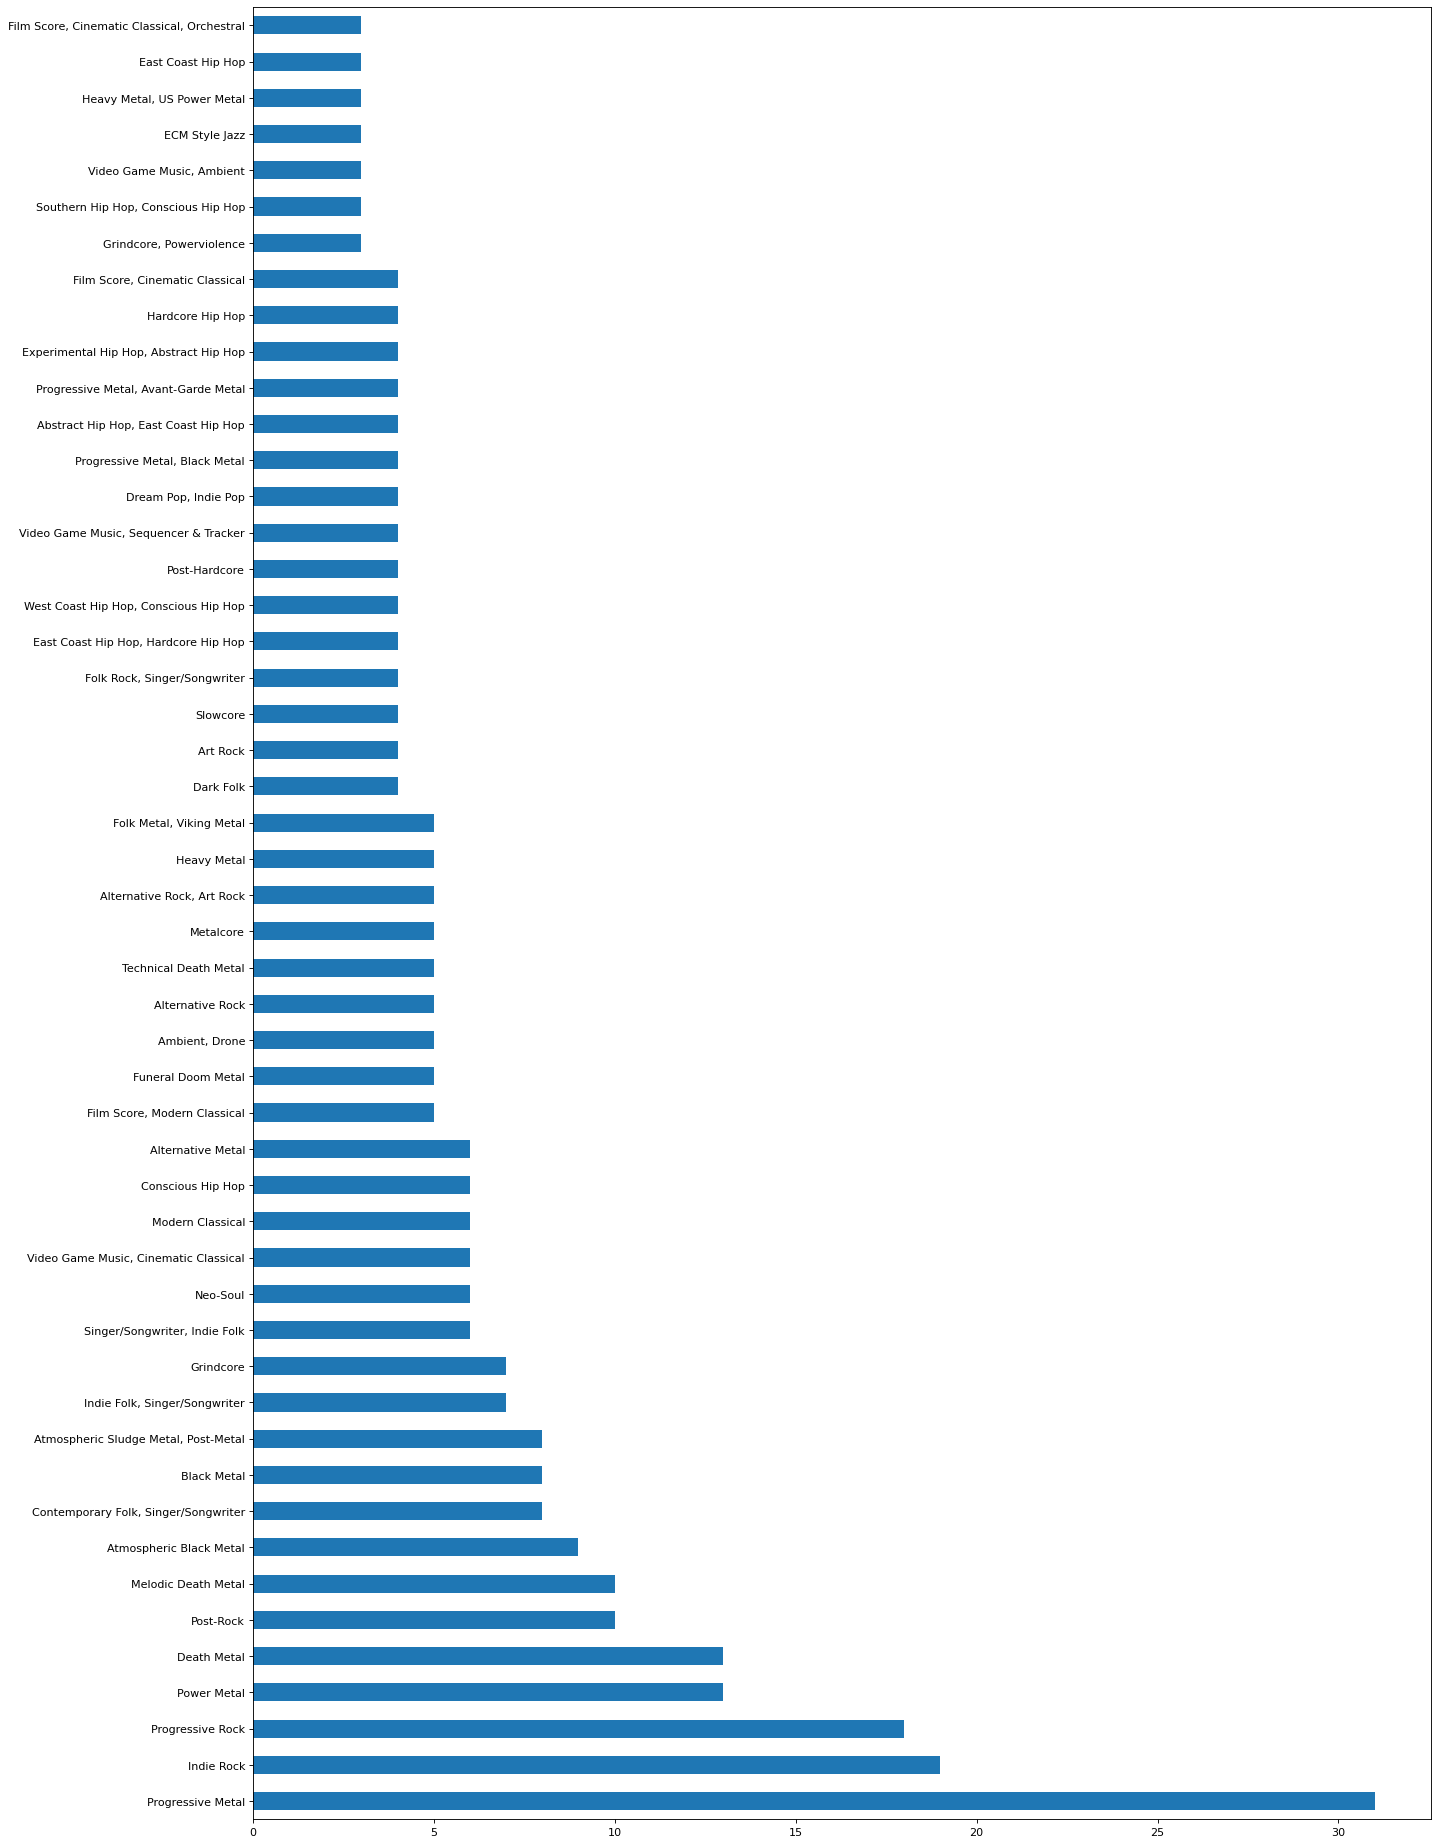

In [425]:
albums_modern = df[(df['year'] >= 2000) & (df['year'] <= 2020)]
generate_top_genres_barplot(albums_modern)

In comparison to the classic genres, the modern genres are much more niche, we can also see several types of hiphop now becoming prevelant with its rise to mainstream popular culture. 

We can conclude that the 1970s was indeed a unique and special period when it comes to music history.
We have yet to achieve in modern music the same heights of instrumentality, and danceability. However 
There are several factors that don't have to do with music that could also be influencing the data. Music has a much more personal and niche feel in our current time period due to streaming technology and social media. This has significantly increased the pool of music available to modern listeners. I believe more is needed to find a more accurate depiction of how modern music compares to the classic music that many cherish so deeply.

## Computational Analysis Rules Used

### Rule 1: Tell A Story

The rule states one of benefits of jupyter notebooks is
being able to have a structure similar to a storyboard 
for your analysis. One that has a beginning that introduces
a topic, a middle that describes the steps to be taken, and
an ending that interprets the results. I was able to do this 
by introducing the topic at the beginning, walking through the
data, discussing my findings, and wrapping it up with a conclusion.


### Rule 3: Use cell divisions to make steps clear

Rule 3 mentions putting in effor to try to make each cell in the notebook have a meaningful purpose. Clearly labeling cells and dividing them up into cohesive sections. I was able to do this by organizing my cells and heading to reflect the steps clearly, and not making them overly long winded.

### Rule 4: Modularize Code

It is always good practice to avoid duplicating code when not necessary. Modularization save space, makes debugging easier, and also makes your notebook cleaner. I was able to do this using the launch_dashapp function, as well as the barplot function.

## Citations

“Digital Audio Workstations-the Infrastructure of Music Production: Masters of Media.” Masters of Media | Research Blog Masters of New Media, 24 Oct. 2019, https://mastersofmedia.hum.uva.nl/blog/2019/10/24/digital-audio-workstations-the-infrastructure-of-music-production/. 

The People History -- Steve Pearson. “Music Played in the 1970's Popular Music from the 70s.” 1970s Music History Including Seventies Styles, Bands And Artists, https://www.thepeoplehistory.com/70smusic.html. 